Part A: Basic SVM with Linear Kernel

In [12]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

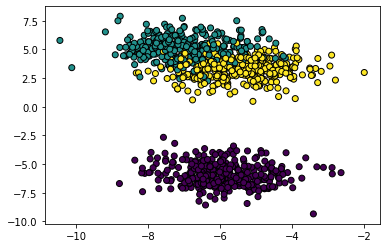

In [35]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=1000, n_features=2, random_state = 86)
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")


In [36]:
# Split data to train and test on 80-20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 8, test_size=20)

In [37]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

# Train classifier
clf.fit(X_train, Y_train)

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,clf)

# Make predictions on unseen test data
#clf_predictions = #############################
predictions = clf.predict(X_test)
print("Accuracy: {}%".format(	metrics.accuracy_score(Y_test, predictions) * 100))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, predictions, average = None))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, predictions, average = None))

Accuracy: 90.0%
Precision: [1.         1.         0.81818182]
Recall: [1.  0.5 1. ]


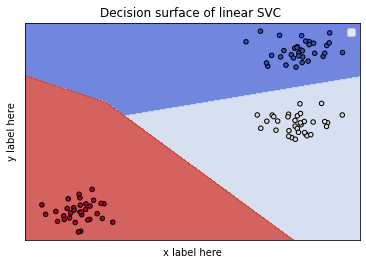

In [48]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Part B : Breast Cancer Prediction Example

In [49]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [51]:
# print the names of the 13 features
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [53]:
# print the label type of cancer('malignant' 'benign')
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [61]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [57]:
# print the cancer labels (0:malignant, 1:benign)
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# plotting scatters
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")

In [62]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear')
#Train the model using the training sets
####################
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state = 8, test_size = 20)
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [63]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9
Precision: 0.9285714285714286
Recall: 0.9285714285714286


4 Exercise

1. Implement SVM classifier on MNIST dataset, compare the performance of linear, poly-
nomial and RBF kernels.

In [52]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist_digits = fetch_openml('mnist_784')
# mnist_digits.head()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [53]:
X = mnist_digits["data"]
Y = mnist_digits["target"]

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 8, test_size = 20)

In [ ]:
from sklearn import metrics

#linear svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

In [ ]:
from sklearn import metrics

#polynomial svm
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

In [ ]:
from sklearn import metrics

#rbf svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

2. What is the accuracy, precision and recall of the models generated in Part A and Part B.


Done Above

3. For Part A and Part B change the value of hyperparameter C and compare the results.

PART A

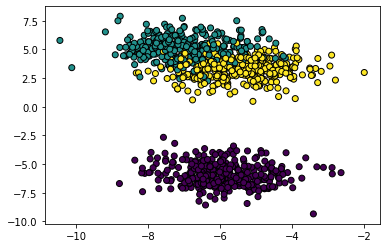

In [43]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=1000, n_features=2, random_state = 86)
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")
# Split data to train and test on 80-20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 8, test_size=20)

In [39]:
# Create a linear SVM classifier
clfa1 = svm.SVC(kernel='linear', C= 100)

# Train classifier
clfa1.fit(X_train, Y_train)

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,clf)

# Make predictions on unseen test data
#clf_predictions = #############################
predictions = clfa1.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, predictions, average = None))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, predictions, average = None))

Accuracy: 0.9
Precision: [1.         1.         0.81818182]
Recall: [1.  0.5 1. ]


In [40]:
# Create a linear SVM classifier
clfa2 = svm.SVC(kernel='linear', C= 0.3)

# Train classifier
clfa2.fit(X_train, Y_train)

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,clf)

# Make predictions on unseen test data
#clf_predictions = #############################
predictions = clfa2.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, predictions, average = None))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, predictions, average = None))

Accuracy: 0.95
Precision: [1.  1.  0.9]
Recall: [1.   0.75 1.  ]


In [51]:
# Create a linear SVM classifier
clfa3 = svm.SVC(kernel='linear', C= 20)

# Train classifier
clfa3.fit(X_train, Y_train)

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,clf)

# Make predictions on unseen test data
#clf_predictions = #############################
predictions = clfa3.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, predictions, average = None))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, predictions, average = None))

Accuracy: 0.9
Precision: [1.         1.         0.81818182]
Recall: [1.  0.5 1. ]


In [49]:
# Create a linear SVM classifier
clfa4 = svm.SVC(kernel='linear', C= 0.00070)

# Train classifier
clfa4.fit(X_train, Y_train)

## Plot decision function on training and test data
#plot_decision_function(X_train, y_train, X_test, y_test,clf)

# Make predictions on unseen test data
#clf_predictions = #############################
predictions = clfa4.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, predictions, average = None))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, predictions, average = None))

Accuracy: 0.95
Precision: [1.  1.  0.9]
Recall: [1.   0.75 1.  ]


PART B

In [6]:
#Import scikit-learn dataset library
from sklearn import datasets
#Import svm model
from sklearn import svm

#Load dataset
cancer = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state = 8, test_size = 20)

In [16]:
#Create a svm Classifier
clfb1 = svm.SVC(kernel='linear', C=3)
#Train the model using the training sets
####################

clfb1.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clfb1.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9
Precision: 0.9285714285714286
Recall: 0.9285714285714286


In [13]:
#Create a svm Classifier
clfb2 = svm.SVC(kernel='linear', C=100)
#Train the model using the training sets
####################

clfb2.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clfb2.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
# Model Precision: what percentage of positive tuples arelabeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred))
# Model Recall: what percentage of positive tuples arelabelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.95
Precision: 1.0
Recall: 0.9285714285714286
